In [133]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [134]:
import math
import numpy as np
import pylab as plt
from scipy.special import gamma
import scipy.integrate as spint
import xraylib

In [135]:
Ekr = np.arange(10, 40, 1)

In [136]:
#поглощение
def absorb(E, material, s, r): 
    """
    This function calculate the intensity of the radiation given absorption.
    
    :param l: wavelength
    :param intensity: intensity without absorption
    :param material: absorbing layer
    :param s: the thickness of the absorbing layer
    :returns: intensity with absorption
    """
    A = exp(-xraylib.CS_Total_CP(material, E)*r*s)
    return A

In [137]:
def func1(E, Ek):
    """
    This function calculate an intrinsic part of the spectrum.
    
    :param l: wavelength
    :type l: int, float
    :returns: an array of intensity values
    :rtype: float
    """
    b=1.0 # константа, узнается из эксперимента
    z=29.0 # порядковый номер элемента анода(медь)
    res = b*z*Ek*Ek/12.39/12.39*E*E*(Ek/12.39-1/12.39*E)
    return res

In [138]:
def func2(E, Ek):
    """
    This function calculate an intrinsic part of the spectrum.
    
    :param l: wavelength
    :type l: int, float
    :returns: an array of intensity values
    :rtype: float
    """
    b=1.0 # константа, узнается из эксперимента
    z=29.0 # порядковый номер элемента анода(медь)
    res = b*z*Ek*Ek/12.39/12.39*E*E*E*(Ek/12.39-1/12.39*E)
    return res

In [139]:
def func3(E, Ek):
    
    b=1.0 # константа, узнается из эксперимента
    z=29.0 # порядковый номер элемента анода(медь)
    res = b*z*Ek*Ek/12.39/12.39*E*E*(Ek/12.39-1/12.39*E)*absorb(E, "H2O", 0.1, 1)
    return res


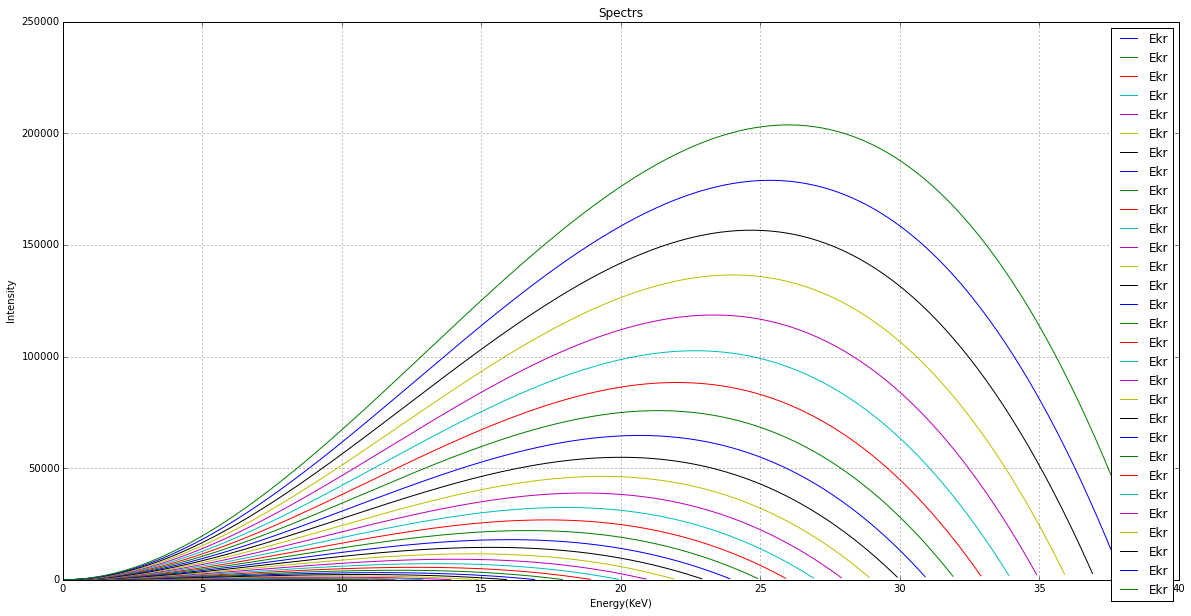

In [140]:
# спектры для различных Ekr на одно графике
plt.figure(figsize=(20,10))
Emax = []
for i in Ekr:
    E=np.arange(0, i, 0.1)
    Emax.append(E[np.argmax(func1(E, i))])
    Etemp = []
    j =0
    while j < (i/0.1):
        Etemp.append(func1(E[j], i)) 
        j = j + 1
    plt.hold(True)
    plt.plot(E, Etemp, label='Ekr')
plt.grid(True)
plt.legend(loc=0)
plt.title('Spectrs')
plt.xlabel('Energy(KeV)')
plt.ylabel('Intensity')

In [150]:
E = np.arange(1, 40, 0.01)
Eclose = []
for i in xrange(0, 30):
    j = 1
    while absorb(E[j], "H2O", 0.1, 1)*100 < ContrastCalc[i]:
        j = j + 1
    Eclose.append(E[j])

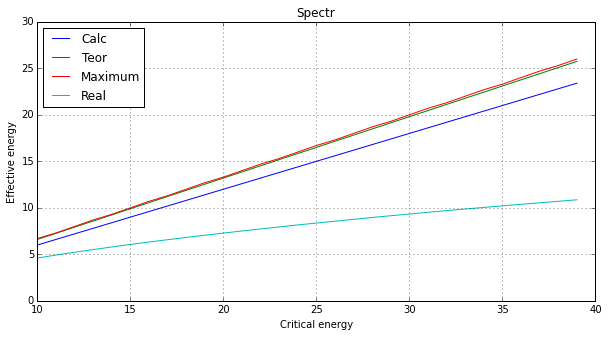

In [151]:
# график зависимомти <E>(Ekr)
Eeff = []
Et = []
for ae in Ekr:
    temp1, _ = spint.quad(func2,0,ae, args=(ae))
    temp2, _ = spint.quad(func1,0,ae, args=(ae))
    Eeff.append(temp1/temp2) # усредненная энергия
    Et.append(0.66*ae) 
plt.figure(figsize=(10,5))
plt.plot(Ekr, Eeff, label='Calc')
plt.plot(Ekr, Et, label='Teor')
plt.plot(Ekr, Emax, label='Maximum')
plt.plot(Ekr, Eclose, label='Real')
plt.grid(True)
plt.legend(loc=0)
plt.title('Spectr')
plt.xlabel('Critical energy')
plt.ylabel('Effective energy')

In [152]:
# расчет контрастности на... 
ContrastMax = [] # E=max
ContrastT = [] # E=teor
ContrastCalc = [] # полихроматика
for ae in Ekr:
    temp2, _ = spint.quad(func1, 0,ae, args=(ae))
    temp1, _ = spint.quad(func3, 0,ae, args=(ae))
    ContrastCalc.append(temp1/temp2*100)
for i in xrange(0, 30):
    ContrastMax.append(absorb(Emax[i], "H2O", 0.1, 1)*100)
    ContrastT.append(absorb(Et[i], "H2O", 0.1, 1)*100)
    print ("%2.2f" % Emax[i], "%2.2f" %ContrastMax[i], "%2.2f" % Et[i], "%2.2f" %ContrastT[i], Ekr[i], "%2.2f" %ContrastCalc[i])

('6.70', '17.08', '6.60', '15.73', 10, '0.42')
('7.30', '25.52', '7.26', '24.95', 11, '1.12')
('8.00', '35.45', '7.92', '34.34', 12, '2.34')
('8.70', '44.64', '8.58', '43.14', 13, '4.11')
('9.30', '51.63', '9.24', '50.97', 14, '6.38')
('10.00', '58.69', '9.90', '57.75', 15, '9.06')
('10.70', '64.63', '10.56', '63.53', 16, '12.05')
('11.30', '68.93', '11.22', '68.39', 17, '15.24')
('12.00', '73.16', '11.88', '72.49', 18, '18.55')
('12.70', '76.67', '12.54', '75.92', 19, '21.88')
('13.30', '79.20', '13.20', '78.81', 20, '25.19')
('14.00', '81.71', '13.86', '81.24', 21, '28.44')
('14.70', '83.81', '14.52', '83.30', 22, '31.58')
('15.30', '85.34', '15.18', '85.05', 23, '34.61')
('16.00', '86.87', '15.84', '86.54', 24, '37.51')
('16.70', '88.17', '16.50', '87.82', 25, '40.26')
('17.30', '89.13', '17.16', '88.92', 26, '42.87')
('18.00', '90.11', '17.82', '89.87', 27, '45.34')
('18.70', '90.95', '18.48', '90.70', 28, '47.67')
('19.30', '91.58', '19.14', '91.42', 29, '49.87')
('20.00', '92.22'

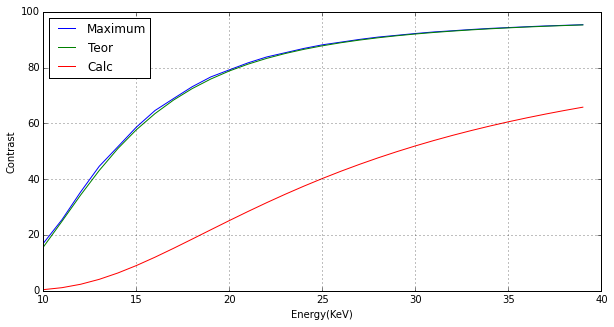

In [153]:
plt.figure(figsize=(10,5))
plt.plot(Ekr, ContrastMax, label='Maximum')
plt.plot(Ekr, ContrastT, label='Teor')
plt.plot(Ekr, ContrastCalc, label='Calc')
plt.grid(True)
plt.legend(loc=0)
plt.title('')
plt.xlabel('Energy(KeV)')
plt.ylabel('Contrast')